<a href="https://colab.research.google.com/github/MinsooKwak/Detection/blob/main/Furniture_Detection/furniture_detection_yolov8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!pip install roboflow

In [2]:
!pip install ultralytics

  Using cached ultralytics-8.2.22-py3-none-any.whl (778 kB)
  Using cached thop-0.1.1.post2209072238-py3-none-any.whl (15 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)


In [3]:
from roboflow import Roboflow
rf = Roboflow(api_key="LGy4rPnUu38hhcMqqByi")
project = rf.workspace("furniture-tngrl").project("furniture_detection-xw469")
version = project.version(1)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.22, to fix: `pip install ultralytics==8.0.196`


In [4]:
import os
import random
import pandas as pd
from PIL import Image
import cv2
from IPython.display import Video
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pathlib
import glob
from tqdm.notebook import trange, tqdm
import warnings
warnings.filterwarnings('ignore')

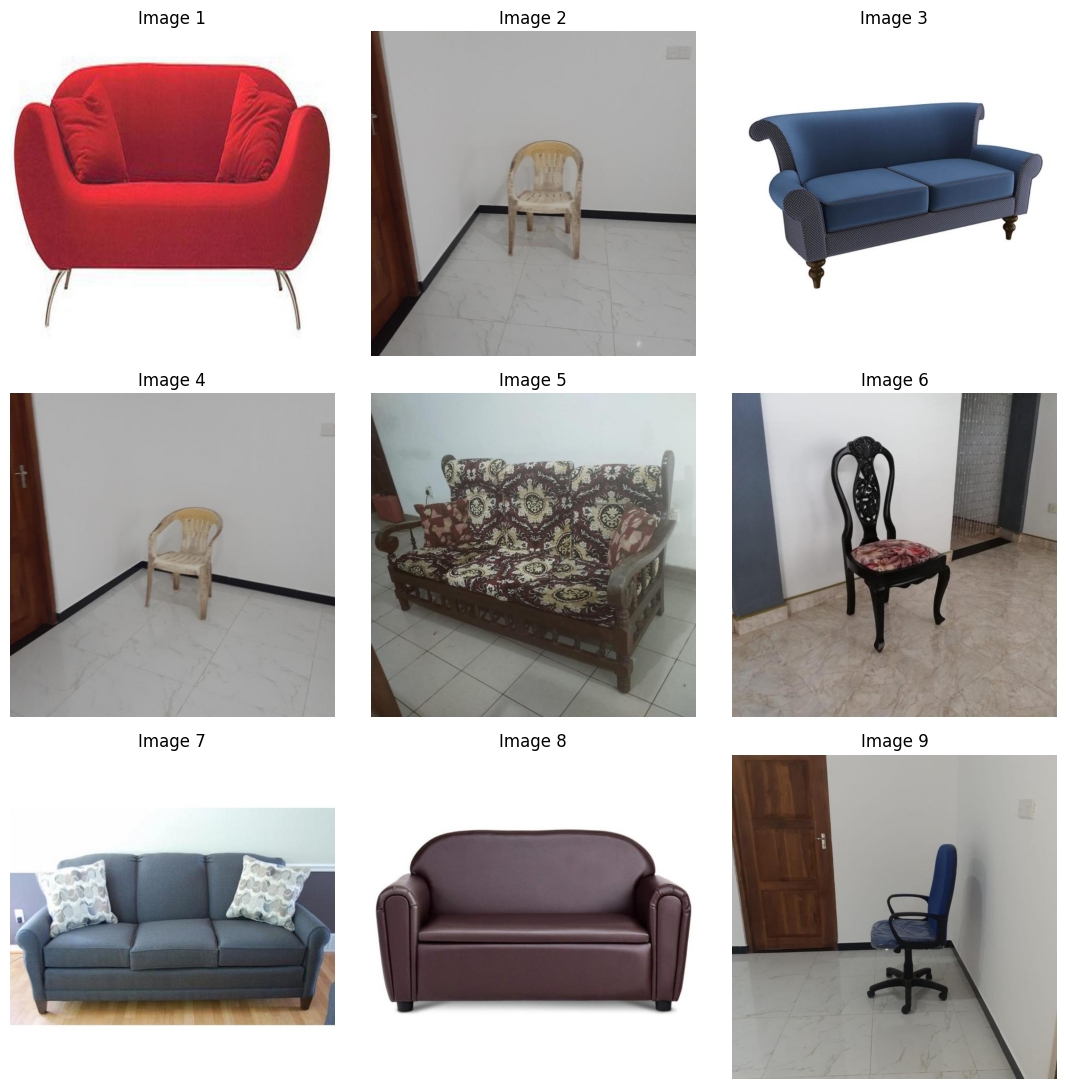

In [5]:
Image_dir = '/content/furniture_detection-1/train/images'

num_samples=9
image_files = os.listdir(Image_dir)

rand_images = random.sample(image_files, num_samples)

fig, axes = plt.subplots(3,3, figsize=(11,11))

for i in range(num_samples):
  image = rand_images[i]
  ax = axes[i //3, i%3]
  ax.imshow(plt.imread(os.path.join(Image_dir, image)))
  ax.set_title(f'Image {i+1}')
  ax.axis('off')

plt.tight_layout()
plt.show()

In [6]:
from ultralytics import YOLO

In [7]:
detection_model = YOLO('yolov8n.pt').load('yolov8n.pt')

100%|██████████| 6.23M/6.23M [00:00<00:00, 163MB/s]


Transferred 355/355 items from pretrained weights



image 1/1 /content/furniture_detection-1/test/images/Chair-269-_jpg.rf.acc202ee7bd2d30964bcb23266e6ed13.jpg: 640x640 1 chair, 10.2ms
Speed: 7.4ms preprocess, 10.2ms inference, 1856.0ms postprocess per image at shape (1, 3, 640, 640)


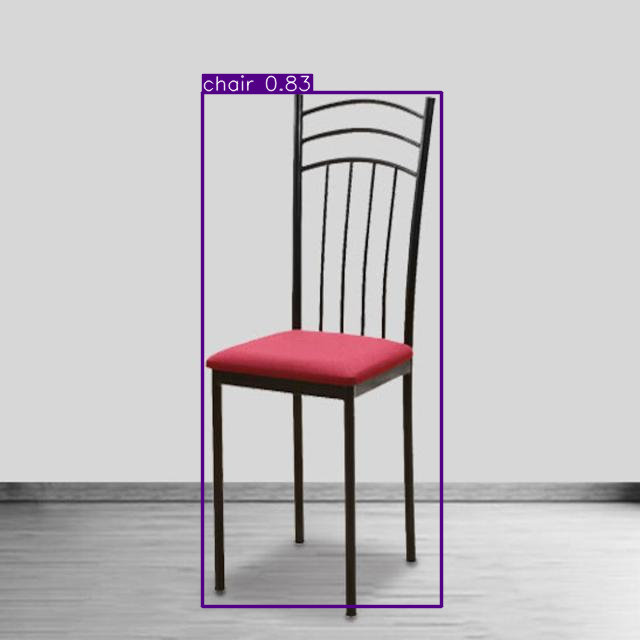

In [8]:
# 학습 전 YOLO base 모델로 확인해보기
image_pre = "/content/furniture_detection-1/test/images/Chair-269-_jpg.rf.acc202ee7bd2d30964bcb23266e6ed13.jpg"
result_predict = detection_model.predict(source=image_pre, imgsz=640)

plot = result_predict[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
display(Image.fromarray(plot))

In [9]:
num_classes = 3
classes = ['Chair','Sofa','Table']

In [10]:
text = """
train: /content/furniture_detection-1/train
val: /content/furniture_detection-1/valid
test: /content/furniture_detection-1/test

# number of classes
nc: 3

# class names
names:
- Chair
- Sofa
- Table
"""

with open('data.yaml','w') as file:
  file.write(text)

## Train

In [11]:
Result_Final_model=detection_model.train(data='data.yaml',
                                         epochs=100,
                                         imgsz=640,
                                         batch=2,
                                         lr0=0.001,
                                         dropout=0.2,
                                         device=1
                                         )

Ultralytics YOLOv8.2.22 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:1 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=data.yaml, epochs=100, time=None, patience=100, batch=2, imgsz=640, save=True, save_period=-1, cache=False, device=1, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.2, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_wid

100%|██████████| 755k/755k [00:00<00:00, 43.1MB/s]


Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/furniture_detection-1/train/labels... 454 images, 0 backgrounds, 0 corrupt: 100%|██████████| 454/454 [00:00<00:00, 544.58it/s]


train: New cache created: /content/furniture_detection-1/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/furniture_detection-1/valid/labels... 161 images, 0 backgrounds, 0 corrupt: 100%|██████████| 161/161 [00:00<00:00, 298.74it/s]

val: New cache created: /content/furniture_detection-1/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100     0.669G      2.092      3.101       2.19          4        640: 100%|██████████| 227/227 [00:26<00:00,  8.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:03<00:00, 11.38it/s]

                   all        161        161      0.552      0.565      0.573      0.283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100     0.489G      1.333      2.153      1.666          5        640: 100%|██████████| 227/227 [00:24<00:00,  9.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:03<00:00, 12.75it/s]

                   all        161        161      0.849      0.462      0.649      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100     0.501G      1.117       1.97      1.547          5        640: 100%|██████████| 227/227 [00:23<00:00,  9.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:07<00:00,  5.66it/s]


                   all        161        161      0.874       0.59      0.813      0.507

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100     0.501G      1.051      1.752      1.506          5        640: 100%|██████████| 227/227 [00:28<00:00,  8.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:03<00:00, 10.27it/s]

                   all        161        161      0.786      0.801      0.884      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100     0.501G     0.9729      1.503       1.43          6        640: 100%|██████████| 227/227 [00:25<00:00,  8.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:02<00:00, 17.59it/s]

                   all        161        161      0.765      0.731      0.864      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100     0.501G     0.9039      1.341      1.392          4        640: 100%|██████████| 227/227 [00:24<00:00,  9.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:02<00:00, 17.78it/s]

                   all        161        161      0.846      0.732      0.865      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100     0.501G     0.8275      1.196      1.317          5        640: 100%|██████████| 227/227 [00:22<00:00, 10.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:03<00:00, 12.72it/s]

                   all        161        161      0.954      0.789      0.937      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100     0.501G     0.8406      1.166      1.326          3        640: 100%|██████████| 227/227 [00:24<00:00,  9.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:02<00:00, 17.81it/s]

                   all        161        161      0.865      0.813       0.89      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100     0.501G     0.8491      1.174       1.31          2        640: 100%|██████████| 227/227 [00:26<00:00,  8.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:03<00:00, 13.55it/s]

                   all        161        161       0.82       0.88      0.922      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100     0.501G     0.7593      1.065      1.263          8        640: 100%|██████████| 227/227 [00:22<00:00, 10.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:02<00:00, 17.73it/s]

                   all        161        161      0.866      0.872      0.932      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100     0.499G     0.7592     0.9973      1.264          5        640: 100%|██████████| 227/227 [00:24<00:00,  9.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:02<00:00, 18.16it/s]

                   all        161        161      0.848      0.877      0.953      0.752



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100     0.499G     0.7416     0.9206      1.251          5        640: 100%|██████████| 227/227 [00:22<00:00,  9.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:03<00:00, 10.81it/s]

                   all        161        161      0.813      0.843      0.937      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100     0.499G     0.7397     0.8983       1.25          2        640: 100%|██████████| 227/227 [00:23<00:00,  9.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:02<00:00, 17.93it/s]

                   all        161        161      0.837       0.69      0.899        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100     0.499G     0.6889     0.8831       1.21          3        640: 100%|██████████| 227/227 [00:24<00:00,  9.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:02<00:00, 14.79it/s]

                   all        161        161       0.89      0.855      0.925      0.759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100     0.499G     0.7139     0.8405      1.235          5        640: 100%|██████████| 227/227 [00:23<00:00,  9.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:02<00:00, 18.30it/s]

                   all        161        161      0.934      0.805      0.932      0.774



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100     0.499G     0.7179     0.8175      1.242          3        640: 100%|██████████| 227/227 [00:25<00:00,  8.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:02<00:00, 17.67it/s]

                   all        161        161      0.839      0.858       0.97      0.774



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100     0.499G     0.6705     0.7863      1.187          2        640: 100%|██████████| 227/227 [00:22<00:00, 10.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:04<00:00,  9.93it/s]

                   all        161        161      0.995      0.788      0.952      0.762



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100     0.499G     0.6816      0.749      1.206          3        640: 100%|██████████| 227/227 [00:22<00:00, 10.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:02<00:00, 18.20it/s]

                   all        161        161      0.942      0.809      0.926      0.754



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100     0.499G     0.6615        0.7      1.175          6        640: 100%|██████████| 227/227 [00:25<00:00,  9.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:02<00:00, 16.32it/s]

                   all        161        161      0.918      0.849       0.96       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100     0.499G     0.6809     0.7035      1.181          8        640: 100%|██████████| 227/227 [00:22<00:00, 10.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:03<00:00, 12.92it/s]

                   all        161        161      0.968      0.932      0.986      0.755



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100     0.499G     0.6722     0.6984      1.183          5        640: 100%|██████████| 227/227 [00:24<00:00,  9.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:02<00:00, 17.95it/s]

                   all        161        161      0.947      0.857      0.974        0.8



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100     0.499G     0.6186     0.6701       1.15          4        640: 100%|██████████| 227/227 [00:23<00:00,  9.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:04<00:00, 10.11it/s]


                   all        161        161      0.941      0.905      0.956      0.775

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100     0.499G     0.6667       0.69      1.189          6        640: 100%|██████████| 227/227 [00:22<00:00,  9.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:02<00:00, 17.96it/s]

                   all        161        161       0.75      0.785      0.842      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100     0.499G     0.6533      0.656      1.174          6        640: 100%|██████████| 227/227 [00:26<00:00,  8.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:02<00:00, 17.63it/s]

                   all        161        161      0.882      0.949      0.953      0.766



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100     0.499G     0.6574     0.6781      1.182          6        640: 100%|██████████| 227/227 [00:22<00:00,  9.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:02<00:00, 13.67it/s]

                   all        161        161       0.78      0.921      0.915      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100     0.499G     0.6194     0.6207      1.163          6        640: 100%|██████████| 227/227 [00:24<00:00,  9.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:02<00:00, 18.28it/s]

                   all        161        161      0.827      0.949      0.958      0.779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100     0.499G     0.5992     0.6412      1.146          2        640: 100%|██████████| 227/227 [00:23<00:00,  9.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:03<00:00, 10.28it/s]

                   all        161        161      0.864      0.835      0.947      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100     0.499G     0.6209     0.6664       1.14          5        640: 100%|██████████| 227/227 [00:23<00:00,  9.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:02<00:00, 16.86it/s]

                   all        161        161      0.982      0.845      0.965      0.783



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100     0.499G     0.5891     0.6262      1.127          4        640: 100%|██████████| 227/227 [00:25<00:00,  8.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:02<00:00, 16.22it/s]

                   all        161        161      0.878      0.967       0.98      0.779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100     0.499G     0.5786     0.5966      1.124          5        640: 100%|██████████| 227/227 [00:23<00:00,  9.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:02<00:00, 16.42it/s]

                   all        161        161      0.914      0.968      0.988      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100     0.499G      0.594     0.5918       1.13          4        640: 100%|██████████| 227/227 [00:24<00:00,  9.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:02<00:00, 17.42it/s]

                   all        161        161      0.912      0.886      0.982      0.839



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100     0.499G     0.5768     0.5871      1.132          6        640: 100%|██████████| 227/227 [00:23<00:00,  9.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:03<00:00, 10.98it/s]

                   all        161        161      0.965      0.932      0.985      0.845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100     0.499G     0.5571     0.5457      1.113          5        640: 100%|██████████| 227/227 [00:22<00:00, 10.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:02<00:00, 18.32it/s]

                   all        161        161      0.846      0.834      0.943       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100     0.499G     0.5969     0.5767      1.128          3        640: 100%|██████████| 227/227 [00:25<00:00,  8.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:02<00:00, 17.48it/s]

                   all        161        161      0.909      0.983      0.977      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100     0.499G     0.5672     0.5698      1.109          6        640: 100%|██████████| 227/227 [00:22<00:00, 10.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:03<00:00, 12.69it/s]

                   all        161        161      0.855      0.895      0.951      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100     0.499G     0.5815     0.5441      1.116          5        640: 100%|██████████| 227/227 [00:23<00:00,  9.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:02<00:00, 18.08it/s]

                   all        161        161      0.956       0.86      0.975      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100     0.499G     0.5637     0.5501       1.11          5        640: 100%|██████████| 227/227 [00:24<00:00,  9.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:03<00:00, 11.00it/s]

                   all        161        161      0.876      0.877      0.966        0.8



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100     0.499G     0.5562     0.5878      1.112          4        640: 100%|██████████| 227/227 [00:22<00:00, 10.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:02<00:00, 17.38it/s]

                   all        161        161      0.915      0.818      0.952      0.793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100     0.499G     0.5524     0.5128      1.096          4        640: 100%|██████████| 227/227 [00:24<00:00,  9.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:02<00:00, 18.02it/s]

                   all        161        161      0.867      0.962       0.98      0.842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100     0.499G     0.5184     0.5071      1.076          4        640: 100%|██████████| 227/227 [00:22<00:00, 10.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:04<00:00, 10.02it/s]

                   all        161        161      0.837      0.811      0.952      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100     0.499G      0.555     0.5304      1.114          7        640: 100%|██████████| 227/227 [00:23<00:00,  9.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:02<00:00, 18.40it/s]

                   all        161        161       0.96      0.779      0.949      0.783



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100     0.499G      0.536     0.5164      1.114          3        640: 100%|██████████| 227/227 [00:24<00:00,  9.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:03<00:00, 11.98it/s]

                   all        161        161      0.985      0.886      0.976      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100     0.499G     0.5535     0.5078       1.12          2        640: 100%|██████████| 227/227 [00:22<00:00,  9.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:02<00:00, 17.36it/s]

                   all        161        161      0.976      0.846       0.97      0.845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100     0.499G      0.552     0.5211       1.12          3        640: 100%|██████████| 227/227 [00:24<00:00,  9.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:02<00:00, 18.36it/s]

                   all        161        161       0.85      0.976      0.972      0.853



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100     0.499G     0.5118     0.4916      1.087          3        640: 100%|██████████| 227/227 [00:22<00:00,  9.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:03<00:00, 10.85it/s]

                   all        161        161      0.935      0.955      0.987      0.852



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100     0.499G     0.5535     0.5159      1.093          5        640: 100%|██████████| 227/227 [00:24<00:00,  9.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:02<00:00, 17.84it/s]

                   all        161        161      0.965       0.96      0.993      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100     0.499G     0.5419     0.5128      1.095          3        640: 100%|██████████| 227/227 [00:24<00:00,  9.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:04<00:00, 10.20it/s]

                   all        161        161      0.906       0.92      0.985      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100     0.499G      0.513     0.4901      1.087          2        640: 100%|██████████| 227/227 [00:22<00:00, 10.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:02<00:00, 17.84it/s]

                   all        161        161      0.938      0.944      0.979      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100     0.499G      0.507     0.4868      1.069          6        640: 100%|██████████| 227/227 [00:24<00:00,  9.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:02<00:00, 18.20it/s]

                   all        161        161      0.858      0.894      0.962      0.849



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100     0.499G     0.5112     0.4972      1.068          6        640: 100%|██████████| 227/227 [00:22<00:00, 10.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:03<00:00, 10.85it/s]

                   all        161        161      0.963      0.977      0.991      0.866



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100     0.499G      0.513     0.5026      1.093          6        640: 100%|██████████| 227/227 [00:22<00:00,  9.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:02<00:00, 18.23it/s]

                   all        161        161      0.904      0.943      0.992      0.861



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100     0.499G     0.4951     0.4695      1.071          6        640: 100%|██████████| 227/227 [00:24<00:00,  9.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:02<00:00, 17.59it/s]

                   all        161        161      0.944       0.96      0.987      0.849



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100     0.499G     0.4906     0.4678      1.053          5        640: 100%|██████████| 227/227 [00:23<00:00,  9.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:02<00:00, 15.61it/s]

                   all        161        161      0.867      0.903      0.983      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100     0.499G     0.4969     0.4527      1.064          8        640: 100%|██████████| 227/227 [00:24<00:00,  9.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:02<00:00, 18.62it/s]

                   all        161        161      0.951       0.85      0.967      0.841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100     0.499G     0.5087     0.4636      1.072          5        640: 100%|██████████| 227/227 [00:23<00:00,  9.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:04<00:00, 10.06it/s]


                   all        161        161       0.96      0.803      0.957      0.833

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100     0.499G     0.5169      0.459      1.089          6        640: 100%|██████████| 227/227 [00:22<00:00,  9.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:02<00:00, 17.89it/s]

                   all        161        161      0.956      0.829      0.949      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100     0.499G     0.4806     0.4347      1.055          4        640: 100%|██████████| 227/227 [00:25<00:00,  8.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:02<00:00, 17.51it/s]

                   all        161        161      0.879      0.871      0.948      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100     0.499G     0.4722      0.425      1.043          5        640: 100%|██████████| 227/227 [00:23<00:00,  9.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:02<00:00, 16.74it/s]

                   all        161        161      0.869      0.797      0.927      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100     0.499G     0.4664     0.4326       1.04          5        640: 100%|██████████| 227/227 [00:25<00:00,  8.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:02<00:00, 18.17it/s]

                   all        161        161      0.927       0.91      0.967      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100     0.499G     0.4737     0.4389      1.058          6        640: 100%|██████████| 227/227 [00:22<00:00,  9.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:03<00:00, 11.61it/s]

                   all        161        161       0.95      0.944      0.961      0.841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100     0.499G     0.5063     0.4651      1.085          6        640: 100%|██████████| 227/227 [00:24<00:00,  9.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:02<00:00, 17.63it/s]

                   all        161        161      0.911      0.896      0.966      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100     0.499G     0.4791     0.4358      1.046          6        640: 100%|██████████| 227/227 [00:23<00:00,  9.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:04<00:00,  9.41it/s]

                   all        161        161      0.866      0.936      0.959      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100     0.499G     0.4887      0.432      1.059          4        640: 100%|██████████| 227/227 [00:22<00:00, 10.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:02<00:00, 17.81it/s]

                   all        161        161      0.871      0.936      0.964      0.843



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100     0.499G     0.4771      0.431      1.053          5        640: 100%|██████████| 227/227 [00:25<00:00,  8.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:02<00:00, 16.91it/s]

                   all        161        161      0.934      0.863      0.965      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100     0.499G     0.4709     0.4424      1.052          6        640: 100%|██████████| 227/227 [00:23<00:00,  9.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:03<00:00, 13.62it/s]

                   all        161        161      0.873      0.919       0.96      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100     0.499G      0.469     0.4258      1.047          7        640: 100%|██████████| 227/227 [00:24<00:00,  9.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:02<00:00, 18.14it/s]

                   all        161        161      0.875      0.906      0.967      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100     0.499G      0.461     0.4207      1.033          3        640: 100%|██████████| 227/227 [00:23<00:00,  9.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:03<00:00, 10.54it/s]

                   all        161        161      0.959      0.877      0.969       0.85



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100     0.499G     0.4831      0.436      1.061          3        640: 100%|██████████| 227/227 [00:23<00:00,  9.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:02<00:00, 17.75it/s]

                   all        161        161      0.977      0.855      0.952      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100     0.499G     0.4867     0.4408      1.077          5        640: 100%|██████████| 227/227 [00:25<00:00,  8.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:02<00:00, 13.71it/s]

                   all        161        161      0.895      0.873       0.95      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100     0.499G     0.4517     0.4133      1.036          3        640: 100%|██████████| 227/227 [00:22<00:00,  9.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:02<00:00, 16.73it/s]

                   all        161        161      0.936      0.885      0.964      0.849



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100     0.499G     0.4598     0.4098      1.047          3        640: 100%|██████████| 227/227 [00:25<00:00,  8.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:02<00:00, 18.26it/s]

                   all        161        161      0.914      0.991      0.986      0.869



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100     0.499G     0.4726     0.4526      1.042          6        640: 100%|██████████| 227/227 [00:22<00:00, 10.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:03<00:00, 10.74it/s]

                   all        161        161      0.897      0.949      0.977      0.857



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100     0.499G     0.4469     0.4076      1.045          3        640: 100%|██████████| 227/227 [00:22<00:00,  9.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:02<00:00, 18.12it/s]

                   all        161        161      0.842      0.957      0.955      0.839



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100     0.499G      0.448     0.4079      1.044          3        640: 100%|██████████| 227/227 [00:24<00:00,  9.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:02<00:00, 18.24it/s]

                   all        161        161      0.896      0.977      0.978      0.888



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100     0.499G     0.4348     0.4087      1.034          2        640: 100%|██████████| 227/227 [00:23<00:00,  9.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:03<00:00, 11.56it/s]

                   all        161        161      0.955      0.954      0.989      0.884



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100     0.499G     0.4464     0.3965      1.034          3        640: 100%|██████████| 227/227 [00:24<00:00,  9.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:02<00:00, 17.51it/s]

                   all        161        161      0.938      0.953      0.988      0.863



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100     0.499G      0.441     0.3969      1.035          3        640: 100%|██████████| 227/227 [00:23<00:00,  9.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:03<00:00, 11.21it/s]

                   all        161        161      0.957      0.934      0.988       0.86



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100     0.499G     0.4466     0.3907      1.036          3        640: 100%|██████████| 227/227 [00:22<00:00, 10.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:02<00:00, 17.69it/s]

                   all        161        161      0.965       0.99      0.991      0.873



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100     0.499G     0.4386      0.381      1.022          5        640: 100%|██████████| 227/227 [00:25<00:00,  8.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:02<00:00, 17.76it/s]

                   all        161        161      0.935      0.962      0.992       0.88



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100     0.499G     0.4304     0.3735      1.029          7        640: 100%|██████████| 227/227 [00:23<00:00,  9.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:04<00:00,  9.79it/s]

                   all        161        161      0.884      0.938      0.977      0.848



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100     0.499G      0.426      0.383       1.03          4        640: 100%|██████████| 227/227 [00:23<00:00,  9.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:02<00:00, 17.91it/s]

                   all        161        161      0.889      0.981      0.978      0.848



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100     0.499G     0.4371     0.3998      1.037          6        640: 100%|██████████| 227/227 [00:25<00:00,  8.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:02<00:00, 17.79it/s]

                   all        161        161      0.866      0.965      0.967      0.862



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100     0.499G     0.4195     0.3746      1.031          6        640: 100%|██████████| 227/227 [00:22<00:00, 10.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:03<00:00, 10.63it/s]

                   all        161        161      0.883      0.959      0.965      0.861



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100     0.499G     0.4274     0.3888      1.021          4        640: 100%|██████████| 227/227 [00:22<00:00,  9.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:02<00:00, 17.83it/s]

                   all        161        161       0.87      0.966      0.964      0.849



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100     0.499G     0.4446     0.4017      1.042          8        640: 100%|██████████| 227/227 [00:25<00:00,  8.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:03<00:00, 12.89it/s]

                   all        161        161      0.843      0.965      0.949      0.843



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100     0.499G     0.4278     0.3716      1.028          3        640: 100%|██████████| 227/227 [00:22<00:00,  9.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:02<00:00, 16.99it/s]

                   all        161        161      0.843      0.975       0.95      0.855



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100     0.499G     0.4198      0.358      1.019          5        640: 100%|██████████| 227/227 [00:25<00:00,  8.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:02<00:00, 17.98it/s]

                   all        161        161      0.843      0.967      0.954      0.855



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100     0.499G     0.4193     0.3506      1.022          8        640: 100%|██████████| 227/227 [00:23<00:00,  9.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:03<00:00, 10.27it/s]

                   all        161        161      0.843      0.969      0.954       0.86



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100     0.499G     0.4184     0.3509      1.034          8        640: 100%|██████████| 227/227 [00:23<00:00,  9.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:02<00:00, 17.99it/s]

                   all        161        161      0.837      0.978      0.961      0.866



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100     0.499G     0.4402     0.3747      1.026          8        640: 100%|██████████| 227/227 [00:25<00:00,  8.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:02<00:00, 17.39it/s]

                   all        161        161      0.947       0.87      0.967       0.87


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100     0.499G     0.2896     0.2567     0.9322          2        640: 100%|██████████| 227/227 [00:23<00:00,  9.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:03<00:00, 12.29it/s]

                   all        161        161       0.95      0.907      0.976      0.883



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100     0.499G     0.2734     0.2499     0.9065          2        640: 100%|██████████| 227/227 [00:23<00:00,  9.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:02<00:00, 18.31it/s]

                   all        161        161      0.954      0.946      0.986      0.878



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100     0.499G     0.2728     0.2489     0.9161          2        640: 100%|██████████| 227/227 [00:23<00:00,  9.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:03<00:00, 12.59it/s]

                   all        161        161      0.899      0.975      0.984      0.883



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100     0.499G     0.2753     0.2469     0.9217          2        640: 100%|██████████| 227/227 [00:22<00:00, 10.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:02<00:00, 17.65it/s]

                   all        161        161      0.942      0.969      0.987      0.882



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100     0.497G     0.2683     0.2398     0.9104          2        640: 100%|██████████| 227/227 [00:25<00:00,  8.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:02<00:00, 18.07it/s]

                   all        161        161      0.949       0.96      0.986      0.879



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100     0.499G     0.2594     0.2306     0.9054          2        640: 100%|██████████| 227/227 [00:22<00:00, 10.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:03<00:00, 12.89it/s]

                   all        161        161      0.941      0.965      0.987      0.881



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100     0.499G     0.2485     0.2266     0.8979          2        640: 100%|██████████| 227/227 [00:23<00:00,  9.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:02<00:00, 17.43it/s]

                   all        161        161      0.903      0.985      0.985      0.882



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100     0.499G     0.2581     0.2232     0.9124          2        640: 100%|██████████| 227/227 [00:24<00:00,  9.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:02<00:00, 13.81it/s]

                   all        161        161       0.92      0.962      0.983      0.879



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100     0.499G     0.2564     0.2354     0.9168          2        640: 100%|██████████| 227/227 [00:22<00:00, 10.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:02<00:00, 17.88it/s]

                   all        161        161        0.9      0.984      0.983      0.876



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100     0.499G     0.2539     0.2249     0.9059          2        640: 100%|██████████| 227/227 [00:25<00:00,  8.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:02<00:00, 17.74it/s]

                   all        161        161      0.902       0.98      0.983      0.876



100 epochs completed in 0.764 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.3MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.22 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:1 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006233 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:02<00:00, 17.29it/s]


                   all        161        161      0.896      0.977      0.978      0.887
                  Sofa        161         23      0.815          1      0.964      0.897
                 Table        161        138      0.978      0.953      0.992      0.878
Speed: 0.7ms preprocess, 5.5ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to runs/detect/train


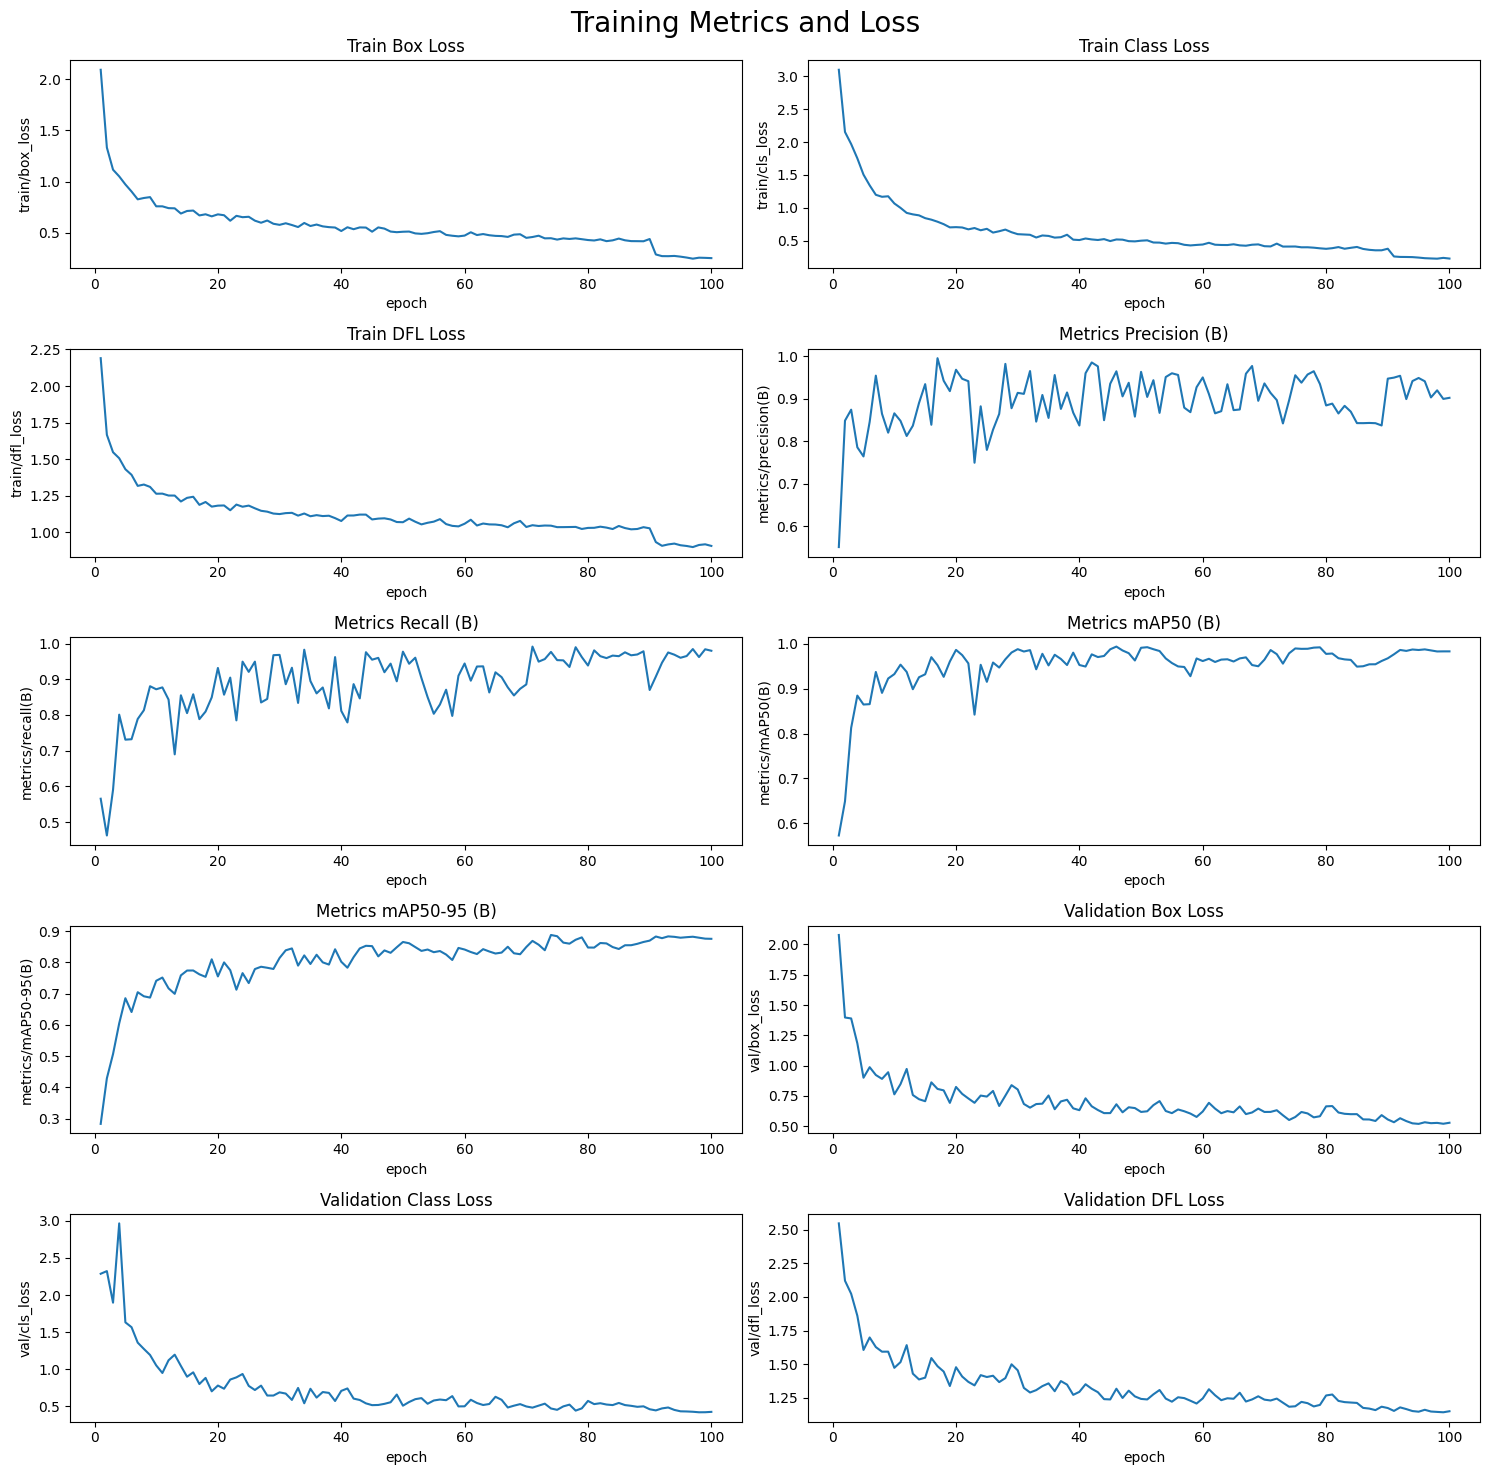

In [12]:
%matplotlib inline

df = pd.read_csv('/content/runs/detect/train/results.csv')
df.columns = df.columns.str.strip()

# create subplot
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15,15))
sns.lineplot(x='epoch', y='train/box_loss', data=df, ax=axs[0,0])
sns.lineplot(x='epoch', y='train/cls_loss', data=df, ax=axs[0,1])
sns.lineplot(x='epoch', y='train/dfl_loss', data=df, ax=axs[1,0])
sns.lineplot(x='epoch', y='metrics/precision(B)', data=df, ax=axs[1,1])
sns.lineplot(x='epoch', y='metrics/recall(B)', data=df, ax=axs[2,0])
sns.lineplot(x='epoch', y='metrics/mAP50(B)', data=df, ax=axs[2,1])
sns.lineplot(x='epoch', y='metrics/mAP50-95(B)', data=df, ax=axs[3,0])
sns.lineplot(x='epoch', y='val/box_loss', data=df, ax=axs[3,1])
sns.lineplot(x='epoch', y='val/cls_loss', data=df, ax=axs[4,0])
sns.lineplot(x='epoch', y='val/dfl_loss', data=df, ax=axs[4,1])

# set titles and axis labels for each subplot
axs[0,0].set(title='Train Box Loss')
axs[0,1].set(title='Train Class Loss')
axs[1,0].set(title='Train DFL Loss')
axs[1,1].set(title='Metrics Precision (B)')
axs[2,0].set(title='Metrics Recall (B)')
axs[2,1].set(title='Metrics mAP50 (B)')
axs[3,0].set(title='Metrics mAP50-95 (B)')
axs[3,1].set(title='Validation Box Loss')
axs[4,0].set(title='Validation Class Loss')
axs[4,1].set(title='Validation DFL Loss')

# subheader title
plt.suptitle('Training Metrics and Loss', fontsize=20)

plt.subplots_adjust(top=0.8)
plt.tight_layout()
plt.show()

## Test

In [13]:
model = YOLO('/content/runs/detect/train/weights/best.pt')

In [14]:
results = model.predict(source=os.path.join('/content/furniture_detection-1','test','images'),save=True)


image 1/74 /content/furniture_detection-1/test/images/Chair-269-_jpg.rf.acc202ee7bd2d30964bcb23266e6ed13.jpg: 640x640 1 Chair, 9.4ms
image 2/74 /content/furniture_detection-1/test/images/Chair-270-_jpg.rf.fe443271ff8a3ef8f04a79574f23e7c6.jpg: 640x640 1 Chair, 10.1ms
image 3/74 /content/furniture_detection-1/test/images/Chairs-1-_jpg.rf.8b6ae0d90fadfcbbd1f663ed97483d6f.jpg: 640x640 1 Chair, 10.0ms
image 4/74 /content/furniture_detection-1/test/images/Chairs-10-_jpg.rf.465a289363064d0b7541e932ca22c8e0.jpg: 640x640 1 Chair, 8.8ms
image 5/74 /content/furniture_detection-1/test/images/Chairs-11-_jpg.rf.ea67306d49996d904a6baadba6eb6c6d.jpg: 640x640 1 Chair, 9.4ms
image 6/74 /content/furniture_detection-1/test/images/Chairs-15-_jpg.rf.ba100dd041ba9e0fbd5b2956109041b5.jpg: 640x640 1 Chair, 9.0ms
image 7/74 /content/furniture_detection-1/test/images/Chairs-16-_jpg.rf.81d012404f3871dd191251f92bc2fc35.jpg: 640x640 1 Chair, 9.3ms
image 8/74 /content/furniture_detection-1/test/images/Chairs-17-_jp

In [15]:
metrics = model.val(conf=0.25, split='test')

Ultralytics YOLOv8.2.22 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


val: Scanning /content/furniture_detection-1/test/labels... 74 images, 0 backgrounds, 0 corrupt: 100%|██████████| 74/74 [00:00<00:00, 1659.53it/s]

val: New cache created: /content/furniture_detection-1/test/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.43it/s]


                   all         74         74      0.998          1      0.995      0.948
                 Chair         74         50      0.997          1      0.995      0.969
                  Sofa         74         24          1          1      0.995      0.928
Speed: 0.6ms preprocess, 12.9ms inference, 0.0ms loss, 5.8ms postprocess per image
Results saved to runs/detect/val


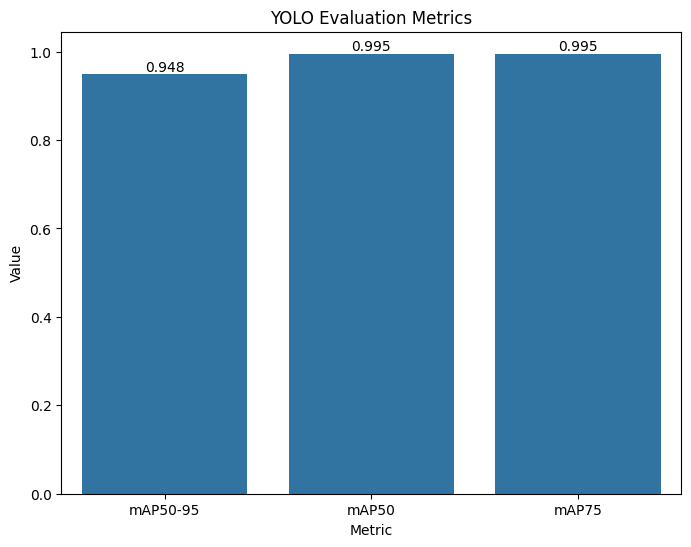

In [16]:
%matplotlib inline

ax = sns.barplot(x=['mAP50-95','mAP50','mAP75'], y=[metrics.box.map, metrics.box.map50, metrics.box.map75])

# Set title
ax.set_title('YOLO Evaluation Metrics')
ax.set_xlabel('Metric')
ax.set_ylabel('Value')

# Set figure size
fig = plt.gcf()
fig.set_size_inches(8,6)

for p in ax.patches:
    ax.annotate('{:.3f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.show()

In [17]:
import matplotlib.image as mpimg

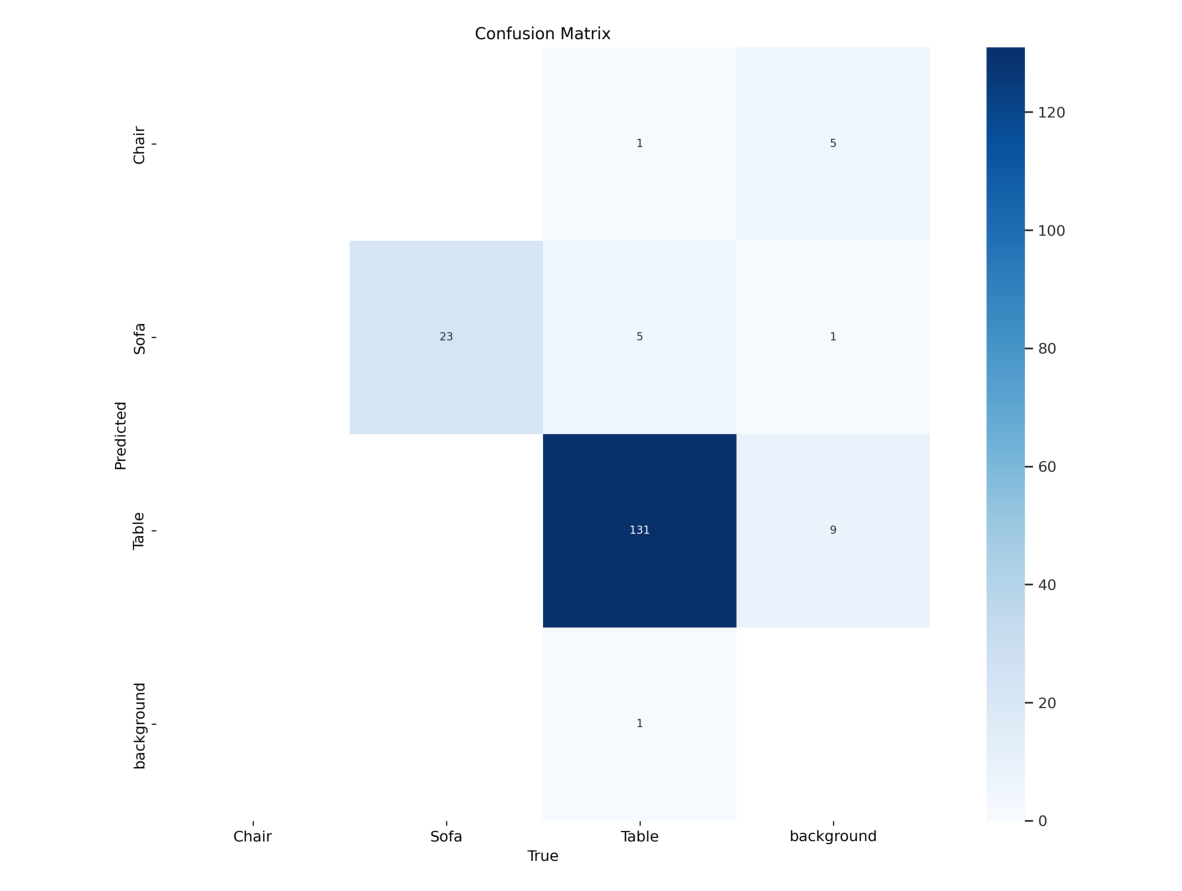

In [18]:
%matplotlib inline

img = mpimg.imread('/content/runs/detect/train/confusion_matrix.png')

fig, ax = plt.subplots(figsize=(15,15))
ax.imshow(img)
ax.axis('off');